In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Indlæsning af data

Iskernedata

In [91]:
rådata_holocæn = pd.read_excel('Temperaturdata_alene.xlsx', header = 29)
rådata_holocæn = rådata_holocæn.to_numpy()
årb2k = rådata_holocæn[:,0]
temp20gns = rådata_holocæn[:,1]


DMI-data

In [25]:
rådataDMI = pd.read_excel('Ægte_DailyMinMax_Ilullisat_Cor-2.xlsx')
rådataDMI = rådataDMI.to_numpy()
årDMI, temperaturDMI = rådataDMI[:,0], rådataDMI[:,1]
print(årDMI)

[1873.     1873.0014 1873.0027 ... 2020.9959 2020.9973 2020.9986]


Jeg slicer DMI-data fra de seneste 20 år med maske.

-3.077481778896673


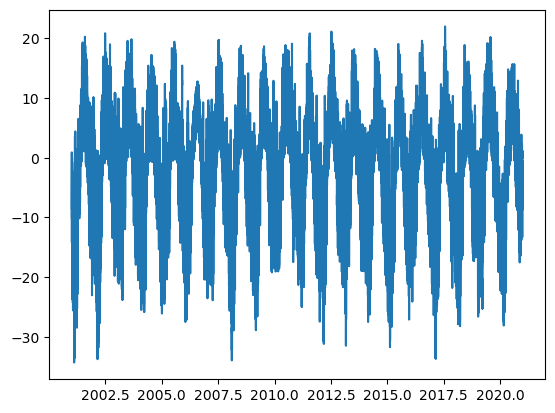

In [37]:
maske = (årDMI < 2021) & (årDMI >= 2001)
årDMI_seneste = årDMI[maske]
temperaturDMI_seneste = temperaturDMI[maske]
gns_DMI_seneste = np.mean(temperaturDMI_seneste)
print(gns_DMI_seneste)

# Konsistensplot
plt.plot(årDMI_seneste, temperaturDMI_seneste)

DMI-data er fra kysten, hvorimod iskernedata er fra midt på iskernen. Der skal derfor trækkes en konstant fra DMI-dataen, inden den tilpasses til 20-årsgennemsnit. Har overlap mellem iskerne-data og DMI-data til og med det iskerne-datapunkt, som dækker perioden 120 - 100 år før 2000. (DMI-data går tilbage til 1873, hvilket er 127 år før år 2000. Men vi bruger kun data til og med 120 år før 2000 i sammenligningen). Iskernedataen går ikke senere end til 1980, hvorfor den nyeste DMI-data også må slices væk.

In [64]:
DMI_overlap = temperaturDMI[(årDMI >= 1880) & (årDMI < 1980)]
DMI_overlap_år = årDMI[(årDMI >= 1880) & (årDMI < 1980)]
iskerne_overlap = temp20gns[årb2k <= 120]
iskerne_overlap_år = årb2k[årb2k <= 120]


# Gennemsnitlig temperaturforskel beregnes

deltatemp = np.mean(iskerne_overlap) - np.mean(DMI_overlap)
print('DMI',np.mean(DMI_overlap))
print('iskerne', np.mean(iskerne_overlap))
print(deltatemp)

DMI_overlap_korr = DMI_overlap + deltatemp

DMI -4.782880609362663
iskerne 0.7780000000000001
5.5608806093626635


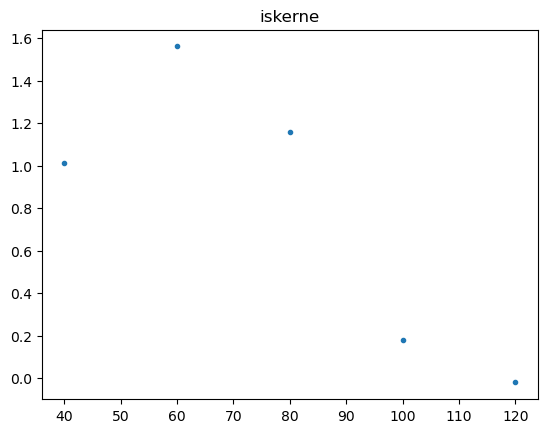

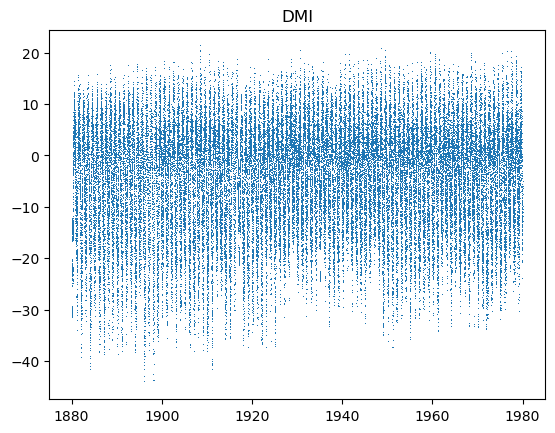

In [55]:
plt.figure()
plt.title('iskerne')
plt.plot(iskerne_overlap_år, iskerne_overlap, '.')

plt.figure()
plt.title('DMI')
plt.plot(DMI_overlap_år, DMI_overlap, ',')

Jeg plotter DMI-data korrigeret for temperaturforskellen mellem iskernedata og DMI-data, som stammer fra geografiske placering.

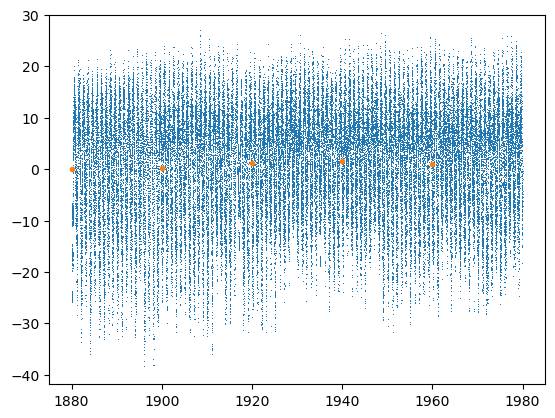

In [65]:
plt.plot(DMI_overlap_år, DMI_overlap_korr, ',')
plt.plot(2000 - iskerne_overlap_år, iskerne_overlap, '.')

Denne korrektion benyttes nu, når hele data udpakkes. Jeg starter med at udpakker for den overlappende data kun.

In [63]:
gns_DMI20år_korr = np.mean(DMI_overlap) + deltatemp

In [86]:
temp_udpakket_list = np.array([])
år_udpakket_list = np.array([])
for i in range(len(iskerne_overlap)):
    temp_udpakket = DMI_overlap_korr + (iskerne_overlap[i] - gns_DMI20år_korr)
    temp_udpakket_list = np.append(temp_udpakket_list, temp_udpakket)
    år_udpakket = np.linspace(2000 - iskerne_overlap_år[i], 2000  - iskerne_overlap_år[i] + 20, len(DMI_overlap_år))
    år_udpakket_list = np.append(år_udpakket_list, år_udpakket)
    
    # Muligvis et problem her, at jeg bare laver nyt linspace, og ikke sørger for, at årene liner op 
    # med dem fra DMI-data.


[-14.59413739  -6.76284539 -15.35528839 ...  -0.38389359  -7.18389339
  -1.78389359]


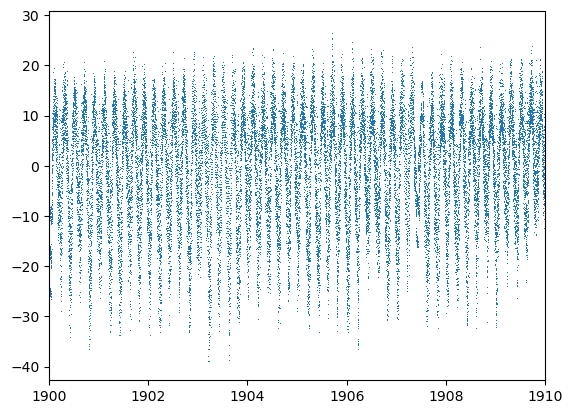

In [90]:
plt.plot(år_udpakket_list, temp_udpakket_list, ',')
plt.xlim(1900, 1910)
print(temp_udpakket_list)

Jeg udpakker al dataen. Læg mærke til, at jeg bruger de samme navne her, så jeg overskriver altså den 'korte' udpakning.

In [98]:
DMI_temp_korr = temperaturDMI_seneste + deltatemp

temp_udpakket_list = np.array([])
år_udpakket_list = np.array([])
for i in range(len(årb2k)):
    temp_udpakket = DMI_temp_korr + (temp20gns[i] - gns_DMI20år_korr)
    temp_udpakket_list = np.append(temp_udpakket_list, temp_udpakket)
    år_udpakket = np.linspace(2000 - årb2k[i], 2000  - årb2k[i] + 20, len(årDMI_seneste))
    år_udpakket_list = np.append(år_udpakket_list, år_udpakket)
    
    # Muligvis et problem her, at jeg bare laver nyt linspace, og ikke sørger for, at årene liner op 
    # med dem fra DMI-data.

(-100.0, 100.0)

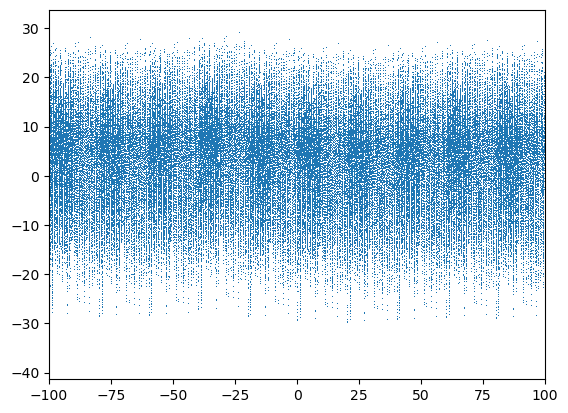

In [100]:
plt.plot(år_udpakket_list, temp_udpakket_list, ',')
plt.xlim(-100,100)

In [95]:
print(DMI_temp_korr)

[-3.03479949  0.96520051  0.06520051 ...  6.74313871  5.56088061
  5.56088061]


In [97]:
print(årDMI_seneste)

[2001.     2001.0014 2001.0027 ... 2020.9959 2020.9973 2020.9986]
